# 📈📊Exploratory  Data Analysis on IPL🏏  using SQL and Seaborn 

![](https://imgs.search.brave.com/5LiREGa01prl4_-0Jb_mnumXPgPh6fKBaZCMsl01YlY/rs:fit:1024:830:1/g:ce/aHR0cHM6Ly93d3cy/LnBpY3R1cmVzLnpp/bWJpby5jb20vZ2kv/Q0xUMjArMjAxMitI/aWdodmVsZCtMaW9u/cyt2K011bWJhaStJ/bmRpYW5zK01ESXlj/UzhfeE1BeC5qcGc)

The **SQLite Database** used in this EDA is related to  ***Indian Premier League***  of  Cricket with 577 matches, players & teams attributes from **seasons 2008 to 2016.** The database has 22 tables storing data related to measurements of various attributes of the game cricket. 

We will use the ***sqlite3*** library of python to connect to the database and use ***pandas*** to read SQL query or database table into a DataFrame  and get the required results and use the ***seaborn*** and ***matplotlib*** data visualization libraries to visualize the data. 

The Database Diagram is given below.
![](https://i.imgur.com/327NVKH.png)

# 📃 Table of Contents 
1. [No of players in the IPL country wise](#1)
2. [Number of matches played in each stadium](#2)
3. [Number of matches played in each city](#3)
4. [How the toss decisions changed over the seasons](#4)
5. [Man of the Series, Purple Cap, Orange Cap winners in every season](#5)
6. [Total Runs scored for the over in all matches.](#6)
7. [Cross Tabulation of Overs and Kind of Dismissals](#7)
8. [Total Number of Match Wins by each team](#8)
9. [Top 10 Man of the Match Award Winners](#9)
10. [Top 10 Highest Run Scorers](#10)
11. [Distribution of Batsman Total Runs & Total Innings](#11)
12. [Scatter Plot of Total Runs and Innings](#12)
13. [Frequency Distribution of Various Dismissals Type](#13)
14. [Frequency of Different Bowlers](#14)
15. [Top 10 Players who got out Maximum times](#15)
16. [Top 10 Wicket Takers](#16)
17. [Variation in Total Extras in a Match Over Time](#17)
18. [Conclusions](#18)

In [194]:
#Import the libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sqlite3

In [2]:
#Connect to database
db_conn = sqlite3.connect('../input/ipldatabase/database.sqlite')

In [3]:
#Get the list of tables in database
tables = pd.read_sql('''
             SELECT * FROM  sqlite_master 
             WHERE type = 'table'
             ''', db_conn)

In [4]:
tables.head()

,type,name,tbl_name,rootpage,sql
0,table,Player,Player,2,CREATE TABLE [Player] (\n\t[Player_Id]\tintege...
1,table,Extra_Runs,Extra_Runs,3,CREATE TABLE [Extra_Runs] (\n\t[Match_Id]\tint...
2,table,Batsman_Scored,Batsman_Scored,7,CREATE TABLE [Batsman_Scored] (\n\t[Match_Id]\...
3,table,Batting_Style,Batting_Style,10,CREATE TABLE [Batting_Style] (\n\t[Batting_Id]...
4,table,Bowling_Style,Bowling_Style,11,CREATE TABLE [Bowling_Style] (\n\t[Bowling_Id]...


In [5]:
print('The list of tables in the database','='*35,
      tables.tbl_name,sep = '\n')

The list of tables in the database
0              Player
1          Extra_Runs
2      Batsman_Scored
3       Batting_Style
4       Bowling_Style
5             Country
6              Season
7                City
8             Outcome
9              Win_By
10       Wicket_Taken
11              Venue
12         Extra_Type
13           Out_Type
14      Toss_Decision
15             Umpire
16               Team
17       Ball_by_Ball
18        sysdiagrams
19    sqlite_sequence
20              Match
21              Rolee
22       Player_Match
Name: tbl_name, dtype: object


In [195]:
#Write a query to read the contents in a table with connection object
pd.read_sql(''' 
        SELECT * FROM Country''', db_conn)

,Country_Id,Country_Name
0,1,India
1,2,South Africa
2,3,U.A.E
3,4,New Zealand
4,5,Australia
5,6,Pakistan
6,7,Sri Lanka
7,8,West Indies
8,9,Zimbabwea
9,10,England


<a id="1"></a> <br>
# 1.  No of players in the IPL country wise

In [7]:
player_country = pd.read_sql('''
       SELECT  Country.Country_Name, 
               COUNT(*) AS Number_of_players FROM Player
       LEFT JOIN Country ON Country.Country_Id = Player.Country_Name
       LEFT JOIN Batting_Style ON Batting_Style.Batting_Id = Player.Batting_hand
       LEFT JOIN Bowling_Style ON Bowling_Style.Bowling_ID = Player.Bowling_skill
       GROUP BY Player.Country_Name
       ORDER BY Number_of_players DESC
       ''', db_conn)

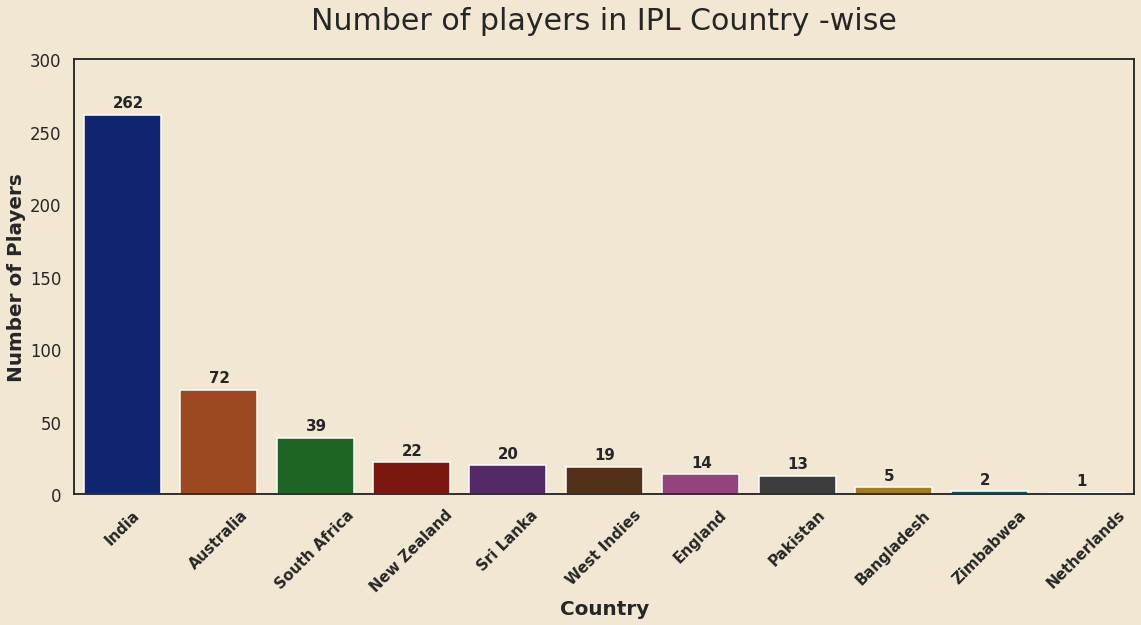

In [79]:
sns.set_theme(style = 'white', context = 'talk', rc = {'axes.facecolor': '#f1e7d2', 'figure.facecolor':'#f1e7d2'})
# Set the Figure Size 
plt.figure(figsize = (19,8))
sns.barplot(x = 'Country_Name', y = 'Number_of_players', data = player_country,palette = sns.color_palette('dark'))
plt.title('Number of players in IPL Country -wise',fontsize = 30 , pad = 30)
plt.xlabel('Country', fontsize = 20, weight = 'bold')
plt.ylabel('Number of Players', fontsize = 20, weight = 'bold')
plt.xticks(rotation = 45 , horizontalalignment='center',fontsize = 15, weight = 'black')
plt.ylim(0,300)
#Place labels on the side of the bars
labels = player_country.Number_of_players.tolist()
for i in range(len(player_country)):
    # Pass the x and y coordinates of the label to place in graph
    plt.text(x = i - 0.1, y = player_country.iloc[i,1]+5, s = (labels[i]), fontsize = 15, weight = 1000)
plt.show()

There are  **262** players from India. The majority of the foreign players are from Australia and South Africa with **72** and  **39** layers respectively. There is a single player from Netherlands. 

In [10]:
pd.read_sql('''
       SELECT *  FROM Player
       LEFT JOIN Country ON Country.Country_Id = Player.Country_Name
       LEFT JOIN Batting_Style ON Batting_Style.Batting_Id = Player.Batting_hand
       LEFT JOIN Bowling_Style ON Bowling_Style.Bowling_ID = Player.Bowling_skill
       
       ''', db_conn)

,Player_Id,Player_Name,DOB,Batting_hand,Bowling_skill,Country_Name,Country_Id,Country_Name,Batting_Id,Batting_hand,Bowling_Id,Bowling_skill
0,1,SC Ganguly,1972-07-08 00:00:00,1,1.0,1,1,India,1,Left-hand bat,1.0,Right-arm medium
1,2,BB McCullum,1981-09-27 00:00:00,2,1.0,4,4,New Zealand,2,Right-hand bat,1.0,Right-arm medium
2,3,RT Ponting,1974-12-19 00:00:00,2,1.0,5,5,Australia,2,Right-hand bat,1.0,Right-arm medium
3,4,DJ Hussey,1977-07-15 00:00:00,2,2.0,5,5,Australia,2,Right-hand bat,2.0,Right-arm offbreak
4,5,Mohammad Hafeez,1980-10-17 00:00:00,2,2.0,6,6,Pakistan,2,Right-hand bat,2.0,Right-arm offbreak
...,...,...,...,...,...,...,...,...,...,...,...,...
464,465,DL Chahar,1992-08-07 00:00:00,2,1.0,1,1,India,2,Right-hand bat,1.0,Right-arm medium
465,466,P Dharmani,1974-09-27 00:00:00,2,NaN,1,1,India,2,Right-hand bat,NaN,None
466,467,RV Pawar,1979-09-06 00:00:00,1,7.0,1,1,India,1,Left-hand bat,7.0,Slow left-arm orthodox
467,468,KH Devdhar,1989-12-14 00:00:00,2,NaN,1,1,India,2,Right-hand bat,NaN,None


<a id="2"></a> <br>
# 2. Number of matches played in each stadium

In [11]:
stadium_count = pd.read_sql('''
      SELECT Venue_Name, Count(*) AS Number_of_matches FROM Match
      LEFT JOIN Venue ON Venue.Venue_Id = Match.Venue_Id
      GROUP BY Venue_Name
      ORDER BY Number_of_matches DESC
      '''
        , db_conn)

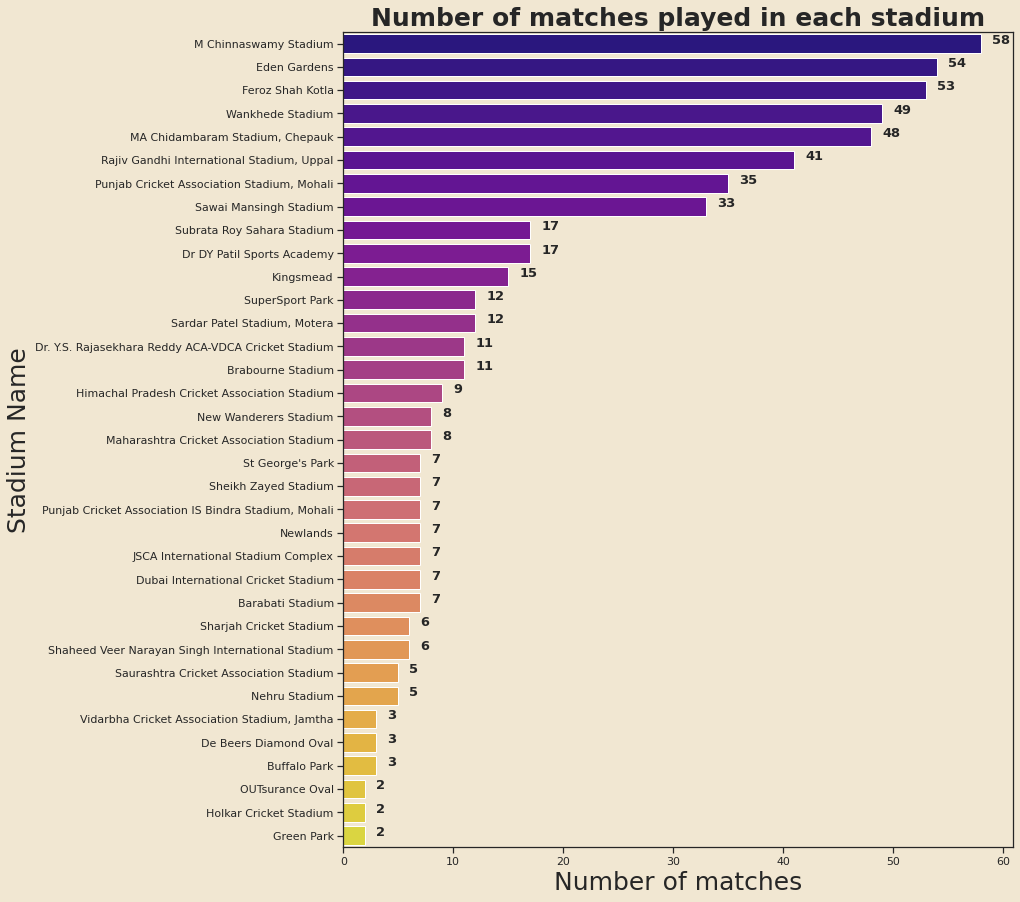

In [80]:
plt.figure(figsize = (12,15))
sns.set_theme(style = 'ticks',rc={'axes.facecolor':'#f1e7d2', 'figure.facecolor':'#f1e7d2'})
sns.barplot(y = 'Venue_Name', x = 'Number_of_matches', data = stadium_count,palette = 'plasma')
plt.title('Number of matches played in each stadium', fontsize = 25, weight = 'extra bold')
plt.xlabel('Number of matches', fontsize = 25, weight = 'roman')
plt.ylabel('Stadium Name', fontsize = 25, weight = 'roman')
#Place labels on the side of the bars
labels = stadium_count.Number_of_matches.tolist()
for i in range(len(stadium_count)):
    # Pass the x and y coordinates of the label to place in graph
    plt.text(x = stadium_count.iloc[i,1] + 1, y = i, s = (labels[i]), fontsize = 13, weight = 750)
plt.show()


The highest number of matches are played in **M Chinnaswamy Stadium.** follwed by **Eden Gardens**.

<a id="3"></a> <br>
# 3. Number of matches played in each city 

In [13]:
 city_country = pd.read_sql('''
      SELECT City_Name, 
             COUNT(*) AS Number_of_matches
      FROM Match
      LEFT JOIN Venue ON Venue.Venue_Id = Match.Venue_Id
      LEFT JOIN City ON City.City_id = Venue.City_Id
      GROUP BY City_Name
      ORDER BY Number_of_matches DESC
      '''
        , db_conn)

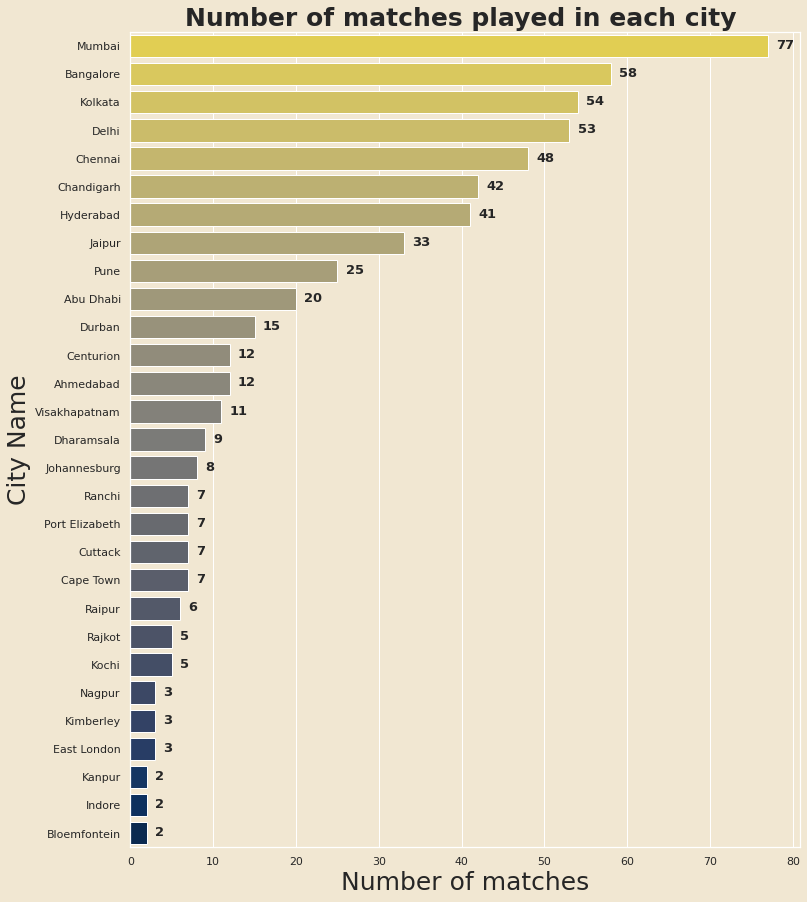

In [90]:
sns.set_context('poster')
sns.set_style('whitegrid')
sns.set(rc={'axes.facecolor':'#f1e7d2', 'figure.facecolor':'#f1e7d2'})
plt.figure(figsize = (12,15))
sns.barplot(y = 'City_Name', x = 'Number_of_matches', data = city_country, palette = 'cividis_r')
plt.title('Number of matches played in each city ', fontsize = 25, weight = 'bold')
plt.xlabel('Number of matches', fontsize = 25)
plt.ylabel('City Name', fontsize = 25)
#Place labels on the side of the bars
labels = city_country.Number_of_matches.tolist()
for i in range(len(city_country)):
    # Pass the x and y coordinates of the label to place in graph
    plt.text(x = city_country.iloc[i,1] + 1, y = i +0.1, s = (labels[i]), fontsize = 13, weight = 750)
plt.show()

The highest number of matches are played in **Mumbai** followed by **Bangalore** and **Kolkata**.

<a id="4"></a> <br>
# 4. How the toss decisions changed over the seasons 

In [15]:
 toss_frequency  = pd.read_sql('''
        SELECT  Season_year, 
                Toss_Name, 
                Count(Toss_Name) AS Frequency FROM Match 
        LEFT JOIN Team ON Team.Team_Id = Match.Toss_Winner
        LEFT JOIN Toss_Decision ON Toss_Decision.Toss_Id = Match.Toss_Decide
        LEFT JOIN  Season On Season.Season_Id = Match.Season_Id
        GROUP BY Season_year, Toss_Name
        ''', db_conn)

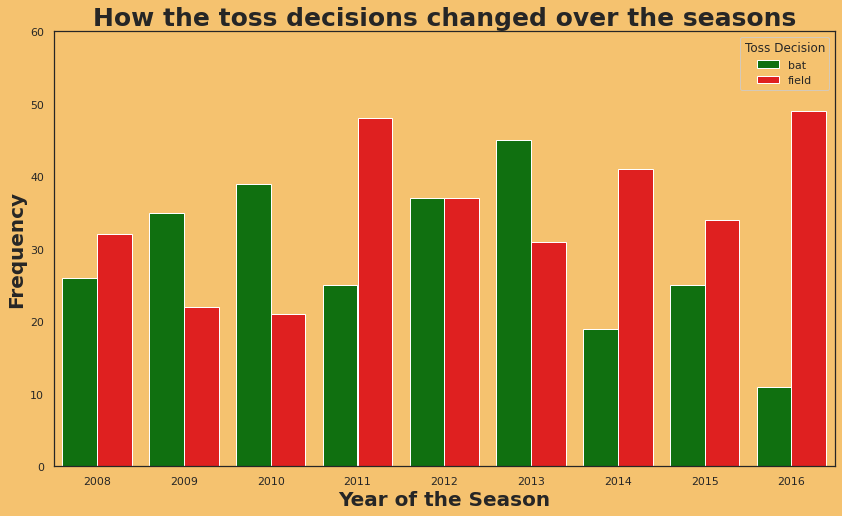

In [50]:

plt.figure(figsize = (14,8))
sns.set_theme(style = 'white',rc={'axes.facecolor':'#F5C26F', 'figure.facecolor':'#F5C26F'})
sns.barplot(x = 'Season_Year', y = 'Frequency',hue = 'Toss_Name', data = toss_frequency , palette = ['green', 'red'] )
plt.title('How the toss decisions changed over the seasons',fontsize = 25 , weight = 'black')
plt.xlabel('Year of the Season',fontsize = 20 , weight = 'black')
plt.ylabel('Frequency', fontsize = 20 , weight = 'black')
plt.ylim(0,60)
plt.legend(title = 'Toss Decision')
plt.show()

We can observe that the teams  who won the toss prefered to **bat first** in the initial seasons but from the last 3 season teams are choosing **to field first** and in the *2016* season field first was the predominant choice. 

<a id="5"></a> <br>
# 5 . Man of the Series, Purple Cap, Orange Cap winners in every season 

In [17]:
pd.options.display.max_columns = None

In [18]:
pd.read_sql('''
        SELECT  Season_year, 
                mos.Player_Name as Man_of_the_series,
                orange.Player_Name as Orange_cap,
                purple.Player_Name as Purple_cap
                FROM Match 
        LEFT JOIN Team ON Team.Team_Id = Match.Toss_Winner
        LEFT JOIN Toss_Decision ON Toss_Decision.Toss_Id = Match.Toss_Decide
        LEFT JOIN  Season On Season.Season_Id = Match.Season_Id
        LEFT JOIN Player  AS mos ON mos.Player_Id = Season.Man_of_the_Series
        LEFT JOIN Player AS orange ON orange.Player_Id = Season.Orange_Cap
        LEFT JOIN Player AS purple on purple.Player_Id = Season.Purple_Cap
        GROUP BY 1
        ''', db_conn)

,Season_Year,Man_of_the_series,Orange_cap,Purple_cap
0,2008,SR Watson,SE Marsh,Sohail Tanvir
1,2009,AC Gilchrist,ML Hayden,RP Singh
2,2010,SR Tendulkar,SR Tendulkar,PP Ojha
3,2011,CH Gayle,CH Gayle,SL Malinga
4,2012,SP Narine,CH Gayle,M Morkel
5,2013,SR Watson,MEK Hussey,DJ Bravo
6,2014,GJ Maxwell,RV Uthappa,MM Sharma
7,2015,AD Russell,DA Warner,DJ Bravo
8,2016,V Kohli,V Kohli,B Kumar


The Orange Cap is presented to the **leading run scorer**  and The Purple Cap is presented to the **leading wicket-taker** in the IPL.  
**CH Gayle** has won 2 Orange Caps and **DJ Bravo** has won 2 Purple Caps. 

<a id="6"></a> <br>
# 6. Total Runs scored for the over in all matches. 

In [19]:
over_runs = pd.read_sql(''' 
   SELECT Over_ID AS Over_No,
        Sum(Runs_Scored) FROM Batsman_Scored
   GROUP BY Over_Id
  ''', db_conn)

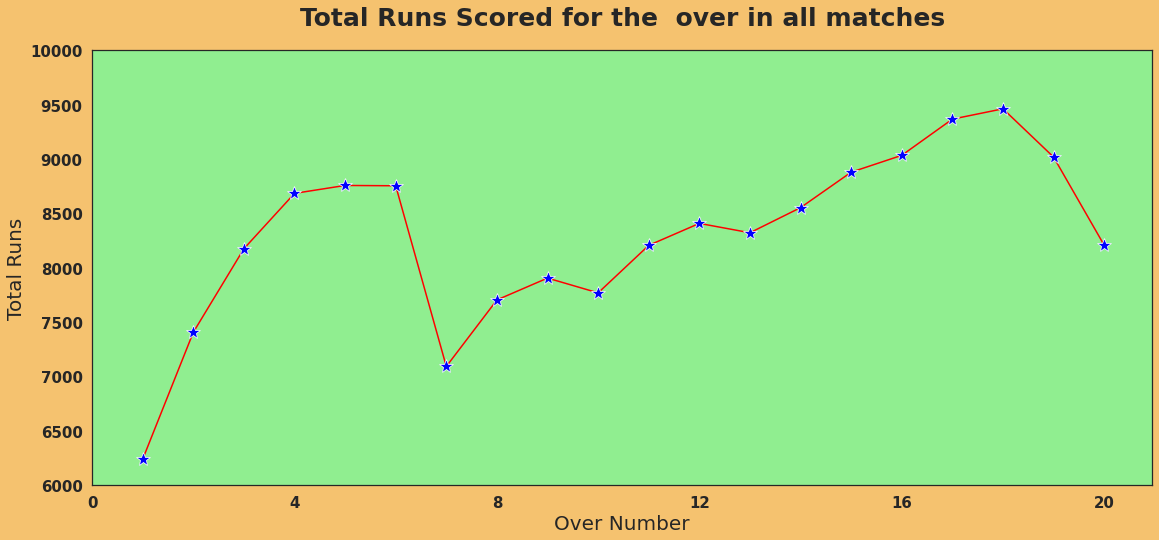

In [51]:
plt.figure(figsize = (19,8))
sns.set_theme(style = 'white',rc={'axes.facecolor':'lightgreen', 'figure.facecolor':'lightblue'})
sns.lineplot(x = 'Over_No', y = 'Sum(Runs_Scored)', data = over_runs, marker = '*', color = 'red', markersize = 15, markerfacecolor = 'blue')
plt.title('Total Runs Scored for the  over in all matches', fontsize = 25,pad = 25, weight = 1000)
plt.xlabel('Over Number', fontsize = 20)
plt.ylabel('Total Runs', fontsize = 20)
plt.xticks(ticks = [0,4,8,12,16,20], fontsize = 15, weight = 'extra bold')
plt.yticks(fontsize = 15, weight = 'bold')
plt.ylim(6000,10000)
plt.show()

The least amount of runs are made in the **1st over** and the highest in the **18th over**. The runs scored per over are increasing from 1st over to 6th over from then it is having a sharp drop and rising steadily and picking up momentum from 16th over onwards. The **first six overs** of an innings will be a ***mandatory powerplay,*** with only two fielders allowed outside the 30-yard circle.  Beginning with the seventh over, no more than five fielders will be allowed outside the 30-yard circle. So the batsman are able to score more runs in the first 6 overs. The last 5 overs are commonly referred to as **death overs**. In these overs batting teams will be trying to score runs quicker than normal.

<a id="7"></a> <br>
# 7. Cross Tabulation of Overs and Kind of Dismissals

In [21]:
wicket_crosstab = pd.read_sql('''
    SELECT Over_Id, 
           COUNT(CASE WHEN Out_Name = 'caught' THEN Out_Id END) AS Caught,
           COUNT(CASE WHEN Out_Name = 'bowled' THEN Out_Id END) AS Bowled,
           COUNT(CASE WHEN Out_Name = 'run out' THEN Out_Id END) AS Run_Out,
           COUNT(CASE WHEN Out_Name = 'lbw' THEN Out_Id END) AS Lbw,
           COUNT(CASE WHEN Out_Name = 'retired hurt' THEN Out_Id END) AS Retired_hurt,
           COUNT(CASE WHEN Out_Name = 'stumped' THEN Out_Id END) AS Stumped,
           COUNT(CASE WHEN Out_Name = 'caught and bowled' THEN Out_Id END) AS Caught_and_bowled,
           COUNT(CASE WHEN Out_Name = 'hit wicket' THEN Out_Id END) AS Hit_wicket,
           COUNT(CASE WHEN Out_Name = 'obstructing the field' THEN Out_Id END) AS Obstructing_the_field
    FROM  Wicket_Taken
    JOIN  Out_Type on Out_Type.Out_Id = Wicket_Taken.Kind_Out
    GROUP BY  Over_Id
    ''', db_conn)

In [22]:
wicket_crosstab.set_index('Over_Id', inplace = True)

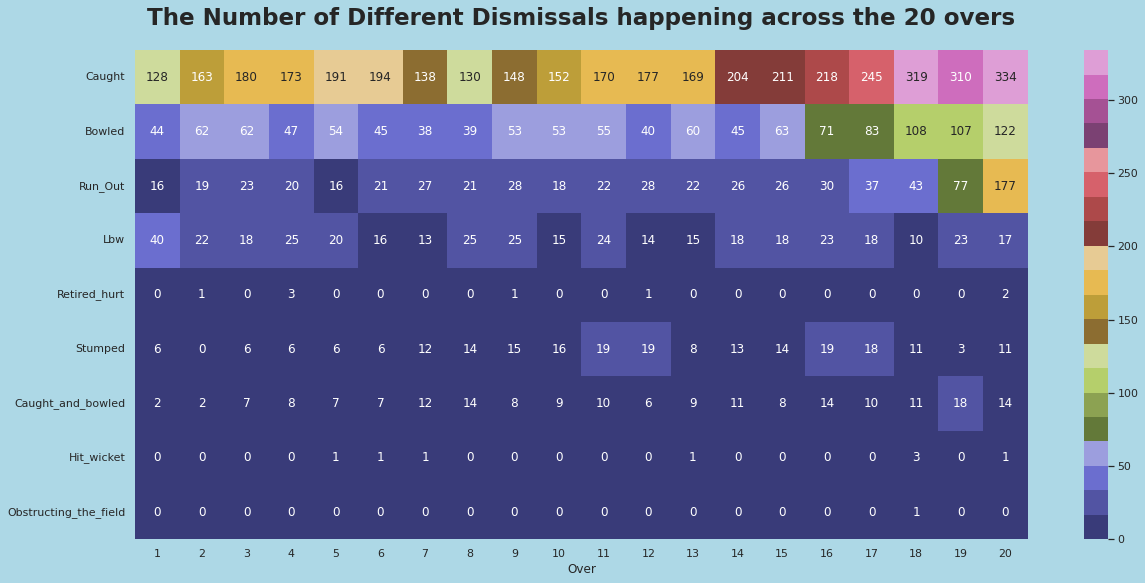

In [23]:
plt.figure(figsize = (20,9))
sns.heatmap(wicket_crosstab.transpose(), annot = True, fmt = '.3g', cmap = 'tab20b')
plt.title('The Number of Different Dismissals happening across the 20 overs', fontsize = 23, pad = 25, weight = 'bold')
plt.xlabel('Over')
plt.show()


True to its name, **death overs** the last 5 overs  are **having most wickets**. As batsman try to score more run as the innings is ending they are risking to score more runs and getting out. The most interesting is the ***run out*** dismissal in the last 2 overs. It may be because as tailenders of the batting team trying to rotate strike to the batsman who can bat well and getting out in the process. The **most common way of getting out are caught, bowled, run out. 

<a id="8"></a> <br>
# 8. Total Number of Match Wins by each team

In [24]:
pd.read_sql(''' Select *  from match
               WHERE  match_winner is null''', db_conn)

,Match_Id,Team_1,Team_2,Match_Date,Season_Id,Venue_Id,Toss_Winner,Toss_Decide,Win_Type,Win_Margin,Outcome_type,Match_Winner,Man_of_the_Match
0,501270,6,10,2011-05-21 00:00:00,4,3,6,2,3,None,2,None,None
1,829768,2,5,2015-04-29 00:00:00,8,1,5,1,3,None,2,None,None
2,829818,2,6,2015-05-17 00:00:00,8,1,2,1,3,None,2,None,None


In [25]:
team_wins = pd.read_sql('''
     SELECT  ifnull(Team_Name, 'No Result') as Team_Name,  Count(*) AS Number_of_wins FROM Match
     LEFT JOIN Team ON Team.Team_Id  = Match.Match_Winner
     GROUP BY Team_Name
     ORDER BY Number_of_wins DESC
     ''',
         db_conn  )

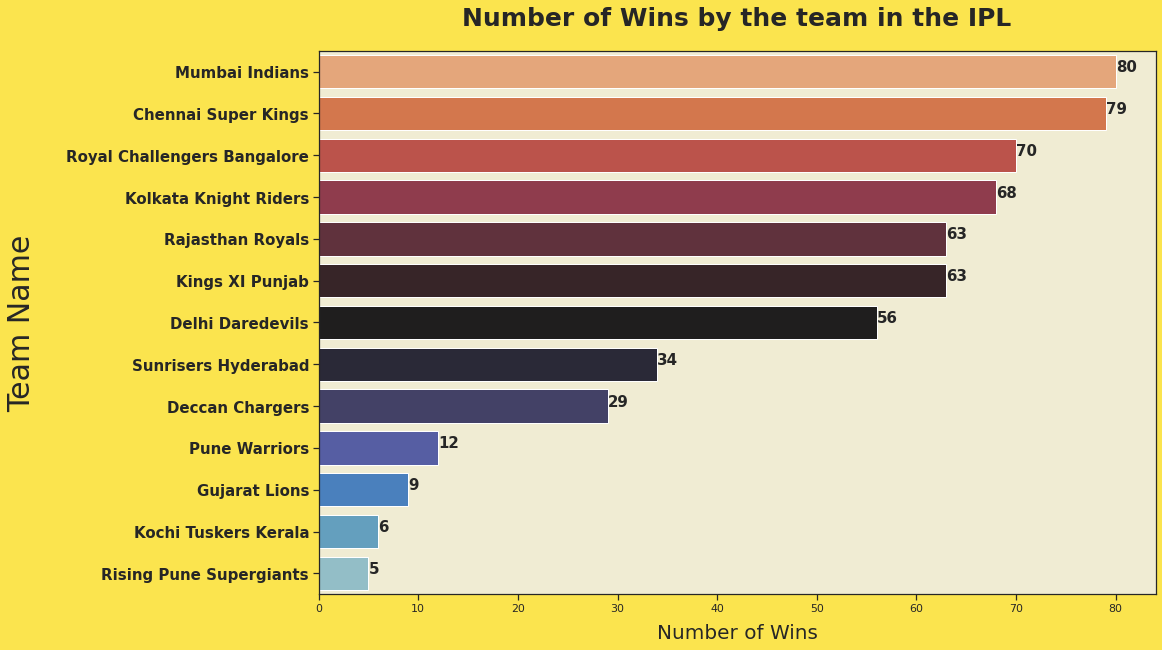

In [72]:
sns.set_theme(style = 'ticks',rc={'axes.facecolor':'#F0ECD3', 'figure.facecolor':'#FBE44E'})
plt.figure(figsize = (15,10))
sns.barplot(y = 'Team_Name', x = 'Number_of_wins', data = team_wins.iloc[:-1,:], palette = 'icefire_r')
plt.yticks(fontsize = 15, weight = 'bold')
plt.ylabel('Team Name', labelpad = 30, fontsize = 30)
plt.xlabel('Number of Wins', labelpad = 10, fontsize = 20, )
plt.title('Number of Wins by the team in the IPL', fontsize = 25, weight = 'bold', pad = 25)
#Place labels on the side of the bars
labels = team_wins.Number_of_wins.tolist()[:-1]
for i in range(len(team_wins)-1):
    # Pass the x and y coordinates of the label to place in graph
    plt.text(x = team_wins.iloc[i,1], y = i, s = (labels[i]), fontsize = 15, weight = 1000)
plt.show()

**Mumbai Indians** won the highest number of matches in the all seasons from 2008 to 2016. **Rising Pune Supergiants** won the least number of matches.  *Pune Warriors ,Gujarat Lions, Kochi Tuskers Kerala, Rising Pune Supergiants* have won less number of matches. These franchises got added in the later seasons of the IPl and some were dissolved too. So they could not play more number of matches. 

<a id="9"></a> <br>
# 9. Top 10 Man of the Match Award Winners

In [27]:
mom = pd.read_sql('''
       SELECT  Player_Name,
               COUNT(*) AS MOM FROM Match
       LEFT JOIN  Player ON Player.Player_Id = Match.Man_of_the_Match 
       WHERE Player_Name IS NOT NULL
       GROUP BY Player_Name
       ORDER BY MOM DESC
       LIMIT 10
       ''', db_conn)

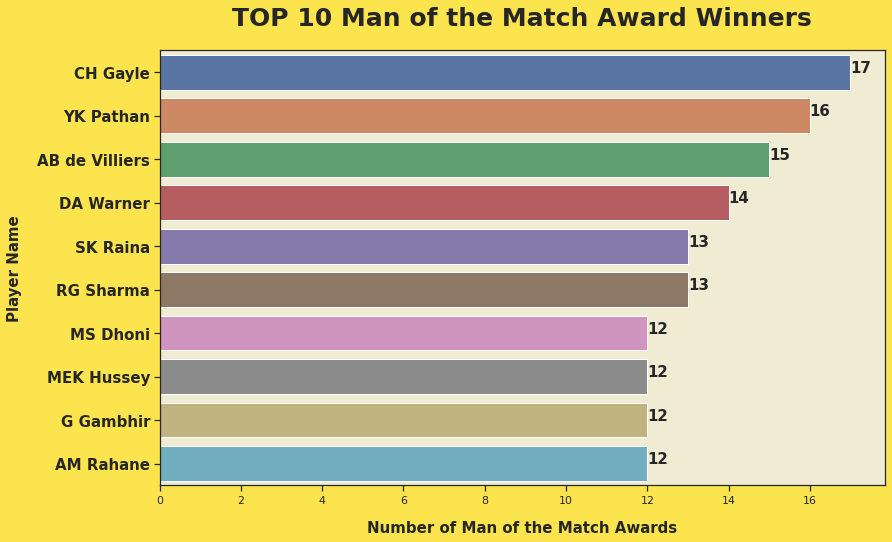

In [71]:
sns.set_theme(style = 'ticks',rc={'axes.facecolor':'#F0ECD3', 'figure.facecolor':'#FBE44E'})
plt.figure(figsize = (13,8))
sns.barplot( y = 'Player_Name', x = 'MOM', data = mom)
plt.xlabel('Number of Man of the Match Awards', labelpad = 15, fontsize = 15, weight = 'bold')
plt.ylabel('Player Name', labelpad = 15, fontsize = 15, weight = 'bold')
plt.title('TOP 10 Man of the Match Award Winners', fontsize = 25,pad = 25, weight = 'bold')
plt.yticks(fontsize = 15, weight = 'bold')
#Place labels on the side of the bars
labels = mom.MOM.tolist()
for i in range(len(mom)):
    # Pass the x and y coordinates of the label to place in graph
    plt.text(x = mom.iloc[i,1], y = i, s = (labels[i]), fontsize = 15, weight = 1000)
plt.show()

***CH Gayle***  has won the highest number of the Man of the Match Awards.

<a id="10"></a> <br>
# 10. Top 10 Highest Run Scorers

In [29]:
batsman_total = pd.read_sql(''' 
      SELECT Subquery.Player_Name, 
             SUM(Subquery.Runs_Scored)  AS Total_Runs,
             COUNT(DISTINCT Subquery.Match_Id) AS No_of_Innings,
             Subquery.Batting_hand FROM 
      (SELECT 
         Ball_by_Ball.Match_Id, 
         Ball_by_Ball.Over_Id,
         Ball_by_Ball.Ball_Id,
         Ball_by_Ball.Innings_No,
         Ball_by_Ball.Team_Batting,
         Ball_by_Ball.Team_Bowling,
         Ball_by_Ball.Striker_Batting_Position,
         Ball_by_Ball.Striker,
         Ball_by_Ball.Non_Striker,
         Ball_by_Ball.Bowler,
         Batsman_Scored.Runs_Scored,
         Player.Player_Name,
         Batting_Style.Batting_hand
   FROM Ball_by_Ball 
   JOIN Batsman_Scored ON Batsman_Scored.Match_Id = Ball_by_Ball.Match_Id 
                       AND Batsman_Scored.Over_Id = Ball_by_Ball.Over_Id 
                       AND Batsman_Scored.Ball_Id = Ball_by_Ball.Ball_Id
                       AND Batsman_Scored.Innings_No = Ball_by_Ball.Innings_No
   JOIN Player ON Player.Player_Id = Ball_by_Ball.Striker
   JOIN Batting_Style ON Player.Batting_hand = Batting_Style.Batting_Id) AS Subquery
   GROUP BY Player_Name
   ORDER BY Total_Runs DESC
         
        ''', db_conn)

In [30]:
batsman_total

,Player_Name,Total_Runs,No_of_Innings,Batting_hand
0,SK Raina,4106,143,Left-hand bat
1,V Kohli,4105,131,Right-hand bat
2,RG Sharma,3874,137,Right-hand bat
3,G Gambhir,3634,130,Left-hand bat
4,CH Gayle,3447,91,Left-hand bat
...,...,...,...,...
429,L Ablish,0,1,Right-hand bat
430,IC Pandey,0,1,Right-hand bat
431,C Nanda,0,1,Right-hand bat
432,Abdur Razzak,0,1,Left-hand bat


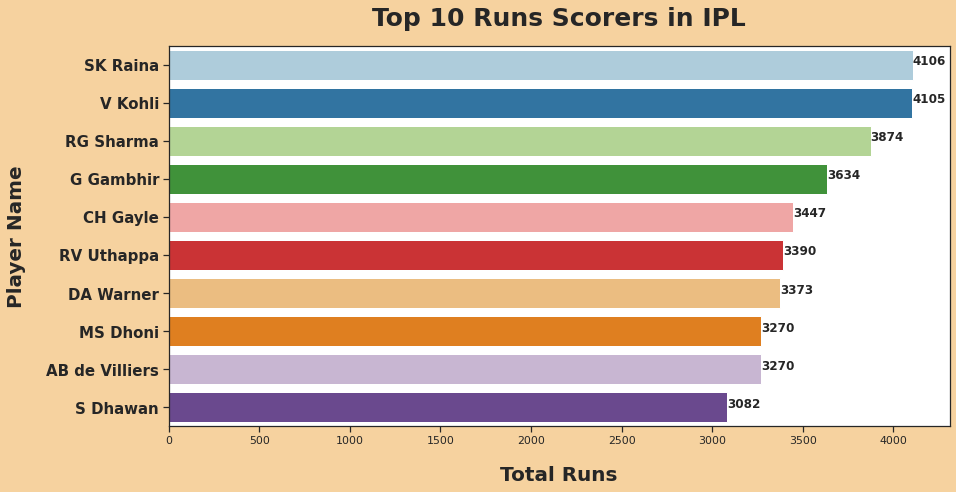

In [58]:
sns.set_theme(style = 'ticks', rc={'axes.facecolor':'white', 'figure.facecolor':'#F6D29F'})
plt.figure(figsize = (14,7))
sns.barplot(y = 'Player_Name', x = 'Total_Runs' , data = batsman_total[:10], palette ='Paired')
plt.title('Top 10 Runs Scorers in IPL', pad = 20, fontsize  = 25, weight = 'bold')
plt.xlabel('Total Runs', labelpad = 20, fontsize = 20, weight = 'bold')
plt.ylabel('Player Name', labelpad = 20, fontsize = 20, weight = 'bold')
plt.yticks(fontsize = 15, weight = 'bold')
#Place labels on the side of the bars
labels = batsman_total.Total_Runs.tolist()[:10]
for i in range(10):
    # Pass the x and y coordinates of the label to place in graph
    plt.text(x = batsman_total.iloc[i,1], y = i, s = (labels[i]), fontsize = 12, weight = 1000)
plt.show()

**SK Raina** has scored the highest total runs with *4106* runs and ***VK Kohli***  with *4105* missed the top position by a whister of a single run. 

<a id="11"></a> <br>
# 11. Distribution of Batsman Total Runs & Total Innings

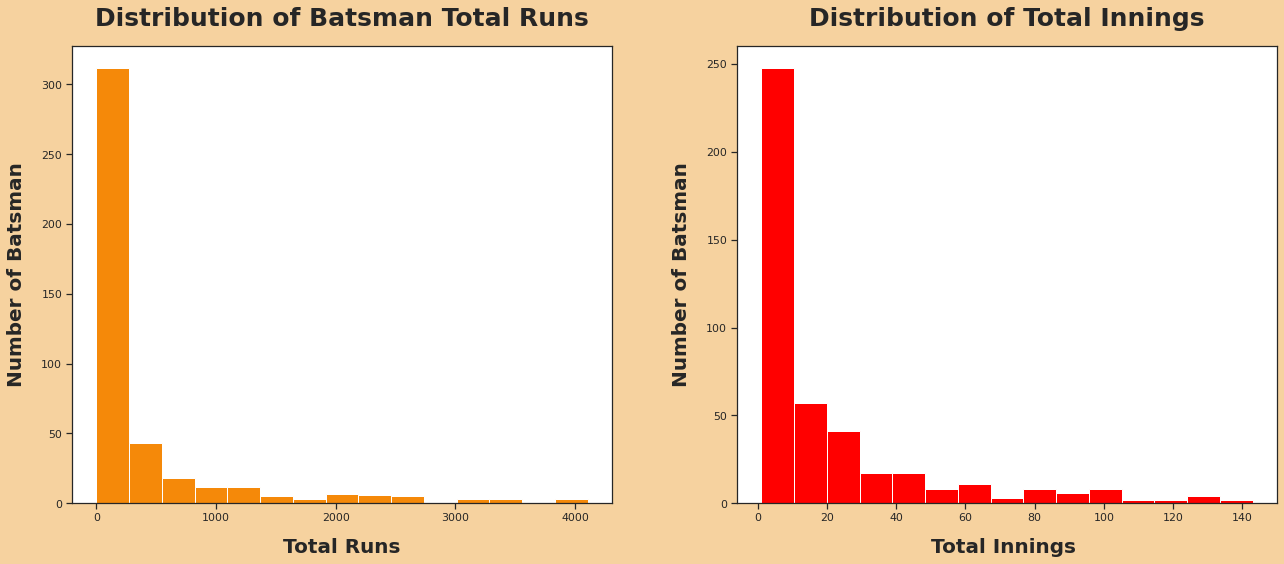

In [56]:
sns.set_theme(style = 'ticks', rc={'axes.facecolor':'white', 'figure.facecolor':'#F6D29F'})
#Create 2 subplots
fig, ax = plt.subplots(1,2, figsize = (18,8))
sns.histplot(x = batsman_total['Total_Runs'], bins = 15,color = '#F58909',legend = False,alpha = 1, ax = ax[0])
sns.histplot(x = batsman_total.No_of_Innings, bins = 15, color = 'red', legend = False, alpha = 1, ax = ax[1])
#Style the first subplot 
ax[0].set_title('Distribution of Batsman Total Runs', pad = 20, fontsize = 25, weight = 'bold')
ax[0].set_xlabel('Total Runs', labelpad = 15, fontsize = 20, weight = 'bold')
ax[0].set_ylabel('Number of Batsman', labelpad = 15, fontsize = 20, weight = 'bold')
# Style the second subplot
ax[1].set_title('Distribution of Total Innings', pad = 20, fontsize = 25, weight = 'bold')
ax[1].set_xlabel('Total Innings ', labelpad = 15, fontsize = 20, weight = 'bold')
ax[1].set_ylabel('Number of Batsman', labelpad = 15, fontsize = 20, weight = 'bold')
fig.tight_layout(w_pad = 5)
plt.show()

The distribution of the Total Runs and Total Innings is *heavily skewed to the towards the right* indicating that few players are the star players.

Majority of players have scored **less than 250 runs** in total and **less than 10 innings.**

<a id="12"></a> <br>
# 12. Scatter Plot of Total Runs and Innings

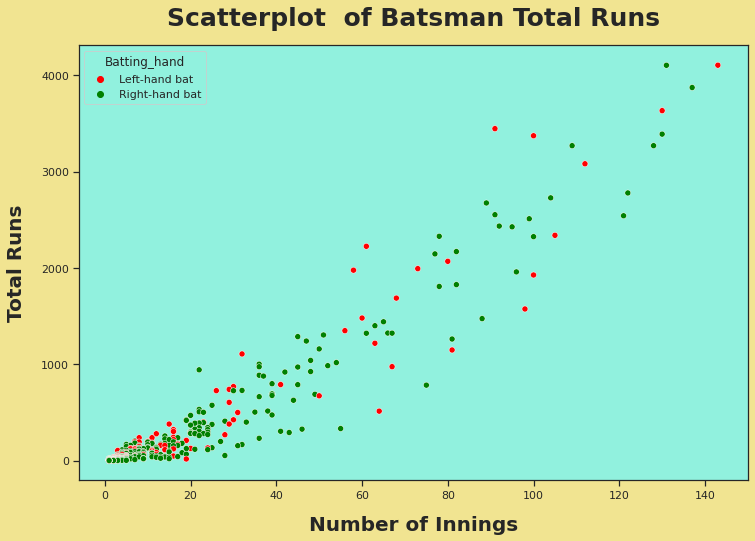

In [55]:
plt.figure(figsize = (12,8))
sns.set_theme(style = 'ticks', context = 'notebook', rc = {'axes.facecolor': '#91F1DE', 'figure.facecolor': '#F1E491'})
sns.scatterplot(x= 'No_of_Innings', y = 'Total_Runs', hue = 'Batting_hand', palette = sns.blend_palette(['red','green'],2),data = batsman_total, facecolor = 'red')
plt.title('Scatterplot  of Batsman Total Runs', pad = 20, fontsize = 25, weight = 'bold', alpha = 1)
plt.xlabel('Number of Innings', labelpad = 15, fontsize = 20, weight = 'bold')
plt.ylabel('Total Runs', labelpad = 15, fontsize = 20, weight = 'bold')
plt.show()

Most of the batsman are ***right handed*** and out of 9 players with more than 120 innings, 7 are right handed batsman. 

<a id="13"></a> <br>
# 13. Frequency Distribution of Various Dismissals Type

In [34]:
dismissals = pd.read_sql(''' 
        SELECT Out_Name, COUNT(Out_Name) as Number_of_outs FROM wicket_taken
        LEFT JOIN Out_Type ON Out_Type.Out_Id =  wicket_taken.Kind_Out
        GROUP BY Out_Name
        ORDER BY 2 
        
        ''', db_conn)

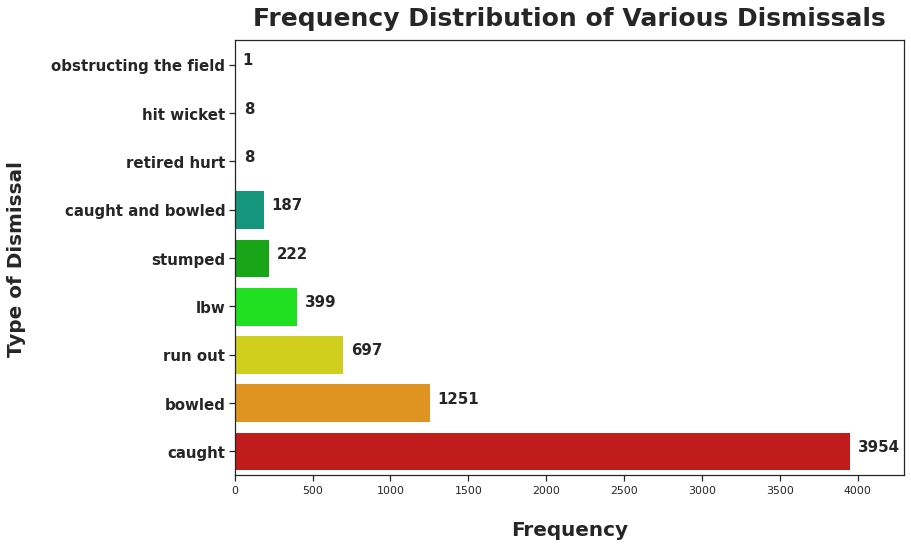

In [68]:

sns.set_style('ticks')
plt.figure(figsize = (12,8))
sns.barplot(y = 'Out_Name', x = 'Number_of_outs', data = dismissals, palette = 'nipy_spectral')
plt.title('Frequency Distribution of Various Dismissals', pad = 15, fontsize = 25, weight = 'bold')
plt.xlabel('Frequency', fontsize = 20, labelpad = 25, weight = 'bold')
plt.ylabel('Type of Dismissal', fontsize = 20, labelpad = 25, weight = 'bold')
plt.yticks(fontsize = 15, weight = 'bold')
plt.xlim(0,4300)
#Place labels on the side of the bars
labels = dismissals.Number_of_outs.tolist()
for i in range(len(dismissals)):
    # Pass the x and y coordinates of the label to place in graph
    plt.text(x = dismissals.iloc[i,1]+ 50, y = i, s = (labels[i]), fontsize = 15, weight = 1000)
plt.show()

*3954* batsman got out by getting *caught* followed by *bowled* , *run out.* . **Only one batsman** got out by *obstructing the fielder* in all the IPL matches.  

<a id="14"></a> <br>
# 14. Frequency of Different Bowlers

In [38]:
bowlers = pd.read_sql(''' SELECT Bowling_style.bowling_skill,
                       COUNT(1) AS Number_of_bowlers
                FROM player
                RIGHT JOIN Bowling_Style ON Bowling_Style.Bowling_Id = Player.Bowling_Skill
                GROUP BY 1
                ORDER BY 2             
                   ''', db_conn)

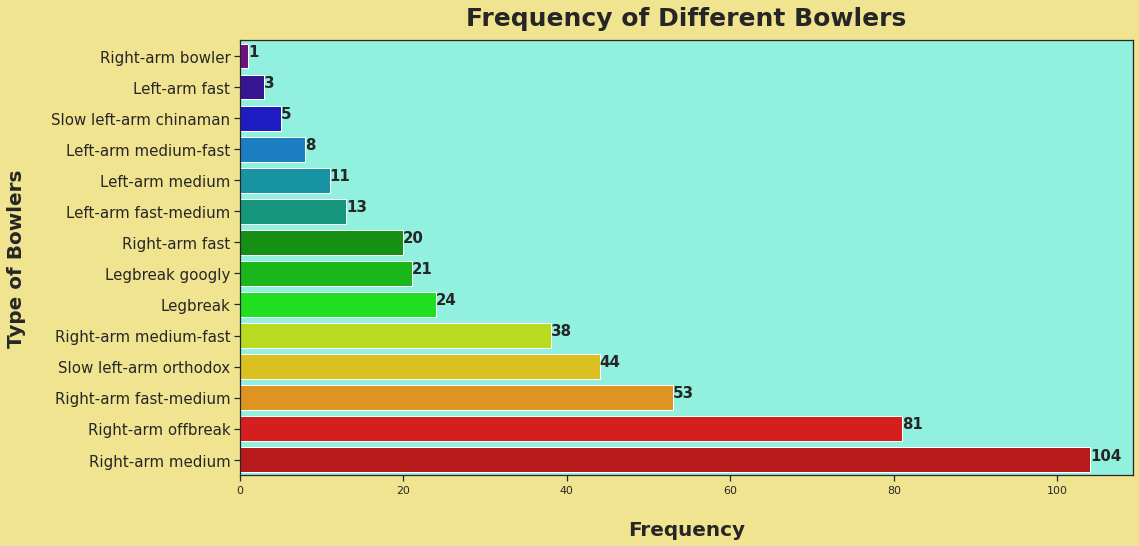

In [64]:
sns.set_theme(style = 'ticks', rc = {'axes.facecolor': '#91F1DE', 'figure.facecolor': '#F1E491'})
plt.figure(figsize = (16,8))
sns.barplot(y = 'Bowling_skill', x = 'Number_of_bowlers', data = bowlers, palette = 'nipy_spectral')
plt.title('Frequency of Different Bowlers', pad = 15, fontsize = 25, weight = 'bold')
plt.xlabel('Frequency', fontsize = 20, labelpad = 25, weight = 'bold')
plt.ylabel('Type of Bowlers', fontsize = 20, labelpad = 25, weight = 'bold')
plt.yticks(fontsize = 15)
#Place labels on the side of the bars
labels = bowlers.Number_of_bowlers.tolist()
for i in range(len(bowlers)):
    # Pass the x and y coordinates of the label to place in graph
    plt.text(x = bowlers.iloc[i,1], y = i, s = (labels[i]), fontsize = 15, weight = 1000)
plt.show()

<a id="15"></a> <br>
# 15. Top 10 Players who got out Maximum times

In [79]:
pd.read_sql('''SELECT  Ball_by_Ball.Match_Id,
           Ball_by_Ball.Over_Id,
           Ball_by_Ball.Ball_Id,
           Ball_by_Ball.Innings_No,
           Ball_by_Ball.Team_Batting,
           Ball_by_Ball.Team_Bowling,
           Ball_by_Ball.Striker_Batting_Position,
           striker.Player_Name AS Striker_Name,
           non_striker.Player_Name AS NonStriker_Name,
           bowler.Player_Name AS Bowler_Name,
           Wicket_Taken.Player_Out,
           player_out.Player_Name AS Player_Out_Name,
           Out_Type.Out_Name,
           Wicket_Taken.Fielders 
    FROM Ball_by_Ball 
   JOIN Wicket_Taken ON Wicket_Taken.Match_Id =  Ball_by_Ball.Match_Id
                     AND Wicket_Taken.Over_Id =  Ball_by_Ball.Over_Id
                     AND Wicket_Taken.Ball_Id =  Ball_by_Ball.Ball_Id
                     AND Wicket_Taken.Innings_No =  Ball_by_Ball.Innings_No 
    JOIN Player striker ON striker.Player_Id = Ball_by_Ball.Striker
    JOIN Player non_striker ON non_striker.Player_Id = Ball_by_Ball.Non_Striker
    JOIN Player bowler ON bowler.Player_Id = Ball_by_Ball.Bowler
    JOIN Player player_out ON player_out.Player_Id = Wicket_Taken.Player_Out
    JOIN Out_Type ON Out_Type.Out_Id = Wicket_Taken.Kind_out''', db_conn)

,Match_Id,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker_Name,NonStriker_Name,Bowler_Name,Player_Out,Player_Out_Name,Out_Name,Fielders
0,335987,2,1,2,2,1,1,R Dravid,W Jaffer,I Sharma,6,R Dravid,bowled,NaN
1,335987,3,2,2,2,1,3,V Kohli,W Jaffer,AB Dinda,8,V Kohli,bowled,NaN
2,335987,5,5,2,2,1,4,JH Kallis,W Jaffer,AB Agarkar,9,JH Kallis,caught,83.0
3,335987,6,2,1,1,2,1,SC Ganguly,BB McCullum,Z Khan,1,SC Ganguly,caught,9.0
4,335987,6,2,2,2,1,2,W Jaffer,CL White,AB Dinda,7,W Jaffer,caught,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6722,981024,17,3,2,2,11,5,SR Watson,Sachin Baby,Mustafizur Rahman,32,SR Watson,caught,163.0
6723,981024,18,3,1,11,2,7,BCJ Cutting,NV Ojha,SR Watson,183,NV Ojha,run out,32.0
6724,981024,19,1,2,2,11,7,STR Binny,Sachin Baby,Mustafizur Rahman,255,STR Binny,run out,394.0
6725,981024,19,4,1,11,2,8,Bipul Sharma,BCJ Cutting,CJ Jordan,228,Bipul Sharma,caught,382.0


In [89]:
number_outs = pd.read_sql(''' 
   SELECT subquery.Player_Out_Name,
          COUNT(subquery.Player_Out_Name) AS Number_Of_Outs FROM 
   (SELECT  Ball_by_Ball.Match_Id,
           Ball_by_Ball.Over_Id,
           Ball_by_Ball.Ball_Id,
           Ball_by_Ball.Innings_No,
           Ball_by_Ball.Team_Batting,
           Ball_by_Ball.Team_Bowling,
           Ball_by_Ball.Striker_Batting_Position,
           Ball_by_Ball.Striker,
           striker.Player_Name AS Striker_Name,
           Ball_by_Ball.Non_Striker,
           non_striker.Player_Name AS NonStriker_Name,
           Ball_by_Ball.Bowler,
           bowler.Player_Name AS Bowler_Name,
           Wicket_Taken.Player_Out,
           player_out.Player_Name AS Player_Out_Name,
           Wicket_Taken.Kind_Out, 
           Out_Type.Out_Name,
           Wicket_Taken.Fielders 
    FROM Ball_by_Ball 
   JOIN Wicket_Taken ON Wicket_Taken.Match_Id =  Ball_by_Ball.Match_Id
                     AND Wicket_Taken.Over_Id =  Ball_by_Ball.Over_Id
                     AND Wicket_Taken.Ball_Id =  Ball_by_Ball.Ball_Id
                     AND Wicket_Taken.Innings_No =  Ball_by_Ball.Innings_No 
    JOIN Player striker ON striker.Player_Id = Ball_by_Ball.Striker
    JOIN Player non_striker ON non_striker.Player_Id = Ball_by_Ball.Non_Striker
    JOIN Player bowler ON bowler.Player_Id = Ball_by_Ball.Bowler
    JOIN Player player_out ON player_out.Player_Id = Wicket_Taken.Player_Out
    JOIN Out_Type ON Out_Type.Out_Id = Wicket_Taken.Kind_out) AS subquery
    GROUP BY 1
    ORDER BY 2 DESC
    LIMIT 10
                     ''',db_conn)

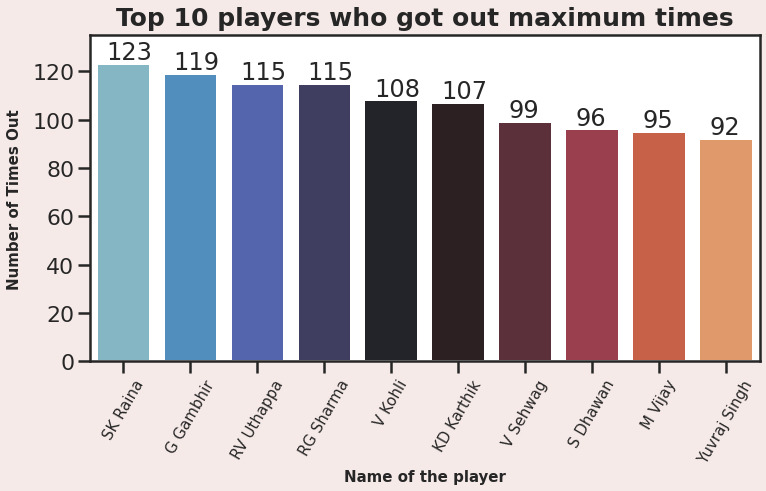

In [193]:
plt.figure(figsize = (12,6))
sns.set_theme(style = 'ticks', context = 'poster',rc={'axes.facecolor':'white', 'figure.facecolor':'#F6EAE8'})
sns.barplot(x = 'Player_Out_Name', y = 'Number_Of_Outs', data = number_outs, palette = 'icefire')
plt.title('Top 10 players who got out maximum times', pad = 10, fontsize = 25, weight = 'extra bold')
plt.xlabel('Name of the player', fontsize = 15, weight = 'bold')
plt.ylabel('Number of Times Out', fontsize = 15,labelpad = 10, weight = 'bold')
plt.xticks(rotation = 60 , fontsize = 15)
plt.ylim(0,135)
labels = number_outs.Number_Of_Outs.tolist()
for i in range(len(number_outs)):
    plt.text(x = i -0.25, y = number_outs.iloc[i,1] + 2, s= labels[i])
plt.show()

***SK Raina*** got out maximum times getting out *123 times.*  

<a id="16"></a> <br>
# 16. Top 10 Wicket Takers

In [184]:
wicket_takers = pd.read_sql(''' 
   SELECT subquery.Bowler_Name,
          COUNT(subquery.Bowler_Name) AS Number_Of_Wickets 
          FROM 
   (SELECT Ball_by_Ball.Match_Id,
           Ball_by_Ball.Over_Id,
           Ball_by_Ball.Ball_Id,
           Ball_by_Ball.Innings_No,
           Ball_by_Ball.Team_Batting,
           Ball_by_Ball.Team_Bowling,
           Ball_by_Ball.Striker_Batting_Position,
           Ball_by_Ball.Striker,
           striker.Player_Name AS Striker_Name,
           Ball_by_Ball.Non_Striker,
           non_striker.Player_Name AS NonStriker_Name,
           Ball_by_Ball.Bowler,
           bowler.Player_Name AS Bowler_Name,
           Wicket_Taken.Player_Out,
           player_out.Player_Name AS Player_Out_Name,
           Wicket_Taken.Kind_Out, 
           Out_Type.Out_Name,
           Wicket_Taken.Fielders 
    FROM Ball_by_Ball 
    JOIN Wicket_Taken ON Wicket_Taken.Match_Id =  Ball_by_Ball.Match_Id
                     AND Wicket_Taken.Over_Id =  Ball_by_Ball.Over_Id
                     AND Wicket_Taken.Ball_Id =  Ball_by_Ball.Ball_Id
                     AND Wicket_Taken.Innings_No =  Ball_by_Ball.Innings_No 
    JOIN Player striker ON striker.Player_Id = Ball_by_Ball.Striker
    JOIN Player non_striker ON non_striker.Player_Id = Ball_by_Ball.Non_Striker
    JOIN Player bowler ON bowler.Player_Id = Ball_by_Ball.Bowler
    JOIN Player player_out ON player_out.Player_Id = Wicket_Taken.Player_Out
    JOIN Out_Type ON Out_Type.Out_Id = Wicket_Taken.Kind_out ) AS subquery
    GROUP BY 1
    ORDER BY 2 DESC
    LIMIT 10
    ''',db_conn)

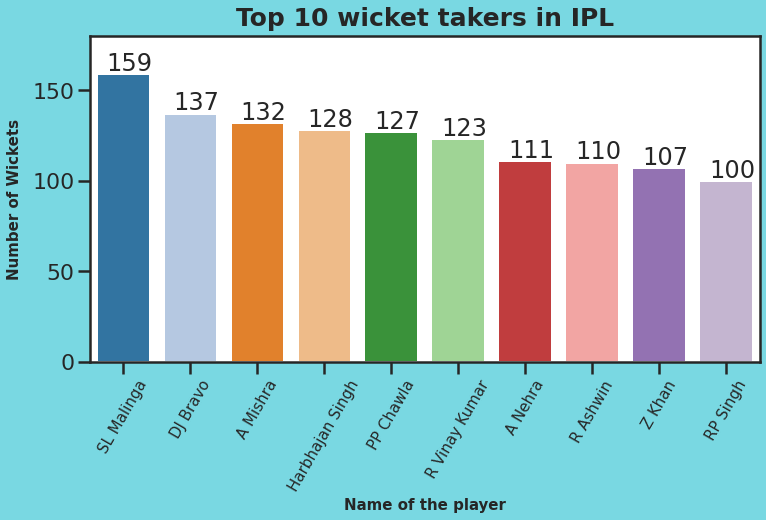

In [45]:
plt.figure(figsize = (12,6))
sns.set_theme(style = 'ticks', context = 'poster',rc={'axes.facecolor':'white', 'figure.facecolor':'#F6EAE8'})
sns.barplot(x = 'Bowler_Name', y = 'Number_Of_Wickets', data = wicket_takers, palette = 'tab20')
plt.title('Top 10 wicket takers in IPL', pad = 10, fontsize = 25, weight = 'extra bold')
plt.xlabel('Name of the player', fontsize = 15, weight = 'bold')
plt.ylabel('Number of Wickets', fontsize = 15,labelpad = 10, weight = 'bold')
plt.xticks(rotation = 60 , fontsize = 15)
plt.ylim(0,180)
labels = wicket_takers.Number_Of_Wickets.tolist()
for i in range(len(wicket_takers)):
    plt.text(x = i -0.25, y = wicket_takers.iloc[i,1] + 2, s= labels[i])
plt.show()


***SL Malinga*** is the top wicket taker with *159 wickets*

<a id="17"></a> <br>
# 17.Variation in Total Extras in a Match Over Time 

In [162]:
extras = pd.read_sql('''
  SELECT  Match_id, 
          SUM(Extra_Runs) AS Total_Extras 
  FROM extra_runs
  GROUP BY 1
  ''', db_conn)

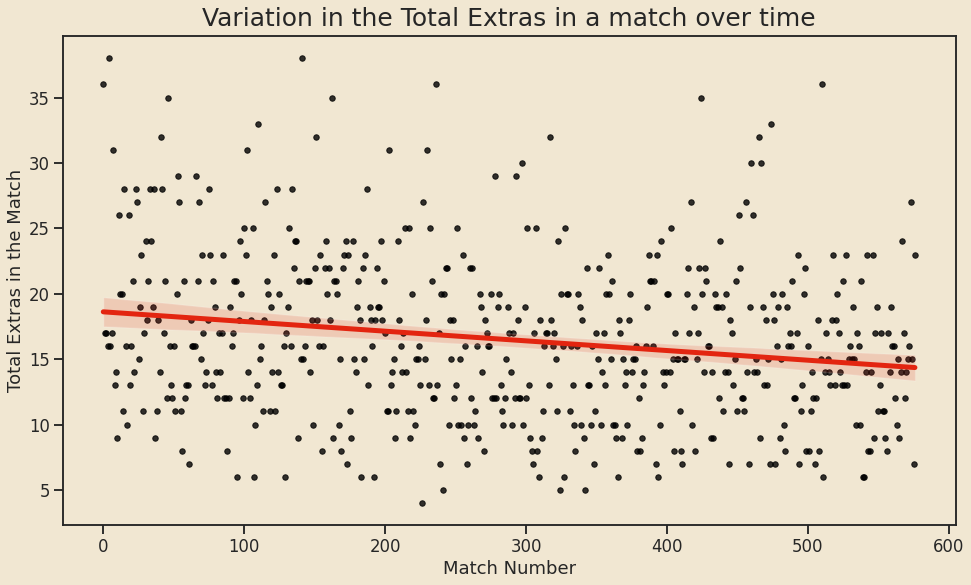

In [179]:
plt.figure(figsize = (16,9))
sns.set_theme(style = 'ticks', context = 'talk',rc={'axes.facecolor':'#f1e7d2', 'figure.facecolor':'#f1e7d2'})
sns.regplot(x = extras.index, y = extras.Total_Extras, data = extras, color = 'black', scatter_kws = {'s':30}, line_kws= {'color' : '#E32510', 'linewidth' : 5})
plt.title('Variation in the Total Extras in a match over time', pad = 10, fontsize = 25)
plt.xlabel('Match Number')
plt.ylabel('Total Extras in the Match')
plt.show()

There is a **decreasing trend** in the total extra runs in a match over time. That means bowlers are getting better and being careful not to award extra runs. 

<a id="18"></a> <br>
# Conclusions:
1. There are  **262** players from India. The majority of the foreign players are from Australia and South Africa with **72** and  **39** players respectively. There is a single player from Netherlands. 
2. The highest number of matches are played in **M Chinnaswamy Stadium.** follwed by **Eden Gardens**.
3. The highest number of matches are played in **Mumbai** followed by **Bangalore** and **Kolkata**.
4. The teams  who won the toss prefered to **bat first** in the initial seasons but from the last 3 season teams are choosing **to field first** and in the *2016* season field first was the predominant choice. 
5. **CH Gayle** has won 2 Orange Caps and **DJ Bravo** has won 2 Purple Caps.
6. The least amount of runs are made in the **1st over** and the highest in the **18th over**. The runs scored per over are increasing from 1st over to 6th over from then it is having a sharp drop and rising steadily and picking up momentum from 16th over onwards. The **first six overs** of an innings will be a ***mandatory powerplay,*** with only two fielders allowed outside the 30-yard circle.  Beginning with the seventh over, no more than five fielders will be allowed outside the 30-yard circle. So the batsman are able to score more runs in the first 6 overs. The last 5 overs are commonly referred to as **death overs**. In these overs batting teams will be trying to score runs quicker than normal.
7. True to its name, **death overs** the last 5 overs  are **having most wickets**. As batsman try to score more run as the innings is ending they are risking to score more runs and getting out. The most interesting is the ***run out*** dismissal in the last 2 overs. It may be because as tailenders of the batting team trying to rotate strike to the batsman who can bat well and getting out in the process. The most common way of getting out are **caught, bowled, run out**. 
8. **Mumbai Indians** won the highest number of matches in the all seasons from 2008 to 2016. **Rising Pune Supergiants** won the least number of matches.  *Pune Warriors ,Gujarat Lions, Kochi Tuskers Kerala, Rising Pune Supergiants* have won less number of matches. These franchises got added in the later seasons of the IPl and some were dissolved too. So they could not play more number of matches. 
9. ***CH Gayle***  has won the highest number of the Man of the Match Awards.
10. **SK Raina** has scored the highest total runs with *4106* runs and ***VK Kohli***  with *4105* missed the top position by a whister of a single run. 
11. The distribution of the Total Runs and Total Innings is *heavily skewed to the towards the right* indicating that few players are the star players. Majority of players have scored **less than 250 runs** in total and **less than 10 innings.**
12. Most of the batsman are ***right handed*** and out of 9 players with more than 120 innings, 7 are right handed batsman. 
13. **3954** batsman got out by getting *caught* followed by *bowled* , *run out.* . **Only one batsman** got out by *obstructing the fielder* in all the IPL matches.  
14. ***SK Raina*** got out maximum times getting out *123 times.*  
15. ***SL Malinga*** is the top wicket taker with *159 wickets*
16. There is a **decreasing trend** in the total extra runs in a match over time. That means bowlers are getting better and being careful not to award extra runs. 